In [166]:
import numpy as np
from qiskit_nature.second_q.operators import FermionicOp
from qiskit_nature.second_q.mappers import JordanWignerMapper,BravyiKitaevMapper
from qiskit.circuit import QuantumCircuit, ParameterVector, Parameter, QuantumRegister

In [137]:
n = 6
N = 2*n
t=1
mu=1.5
U=3

In [138]:
op = FermionicOp(
    {
        "+_0 -_0": 1.0,
        "+_1 -_1": -1.0,
    },
    num_spin_orbitals=2,
)

In [139]:
print(op)

Fermionic Operator
number spin orbitals=2, number terms=2
  1.0 * ( +_0 -_0 )
+ -1.0 * ( +_1 -_1 )


In [140]:
def qOp(i,j):
    return FermionicOp(
    {
        "+_{i} -_{j}".format(i=i%N,j=j%N): 1.0,
    },
    num_spin_orbitals=N,
)

In [141]:
t_term = 0
mu_term =0
U_term =0
for i in range(n):
    t_term+= qOp(2*i,2*i+2) + qOp(2*i+2,2*i) + qOp(2*i+1,2*i+3) + qOp(2*i+3,2*i+1) 
    mu_term += qOp(2*i,2*i) + qOp(2*i+1,2*i+1)
    U_term += (qOp(2*i,2*i) @ qOp(2*i+1, 2*i+1))
H = U * U_term - mu * mu_term - t * t_term

print(H)

Fermionic Operator
number spin orbitals=12, number terms=42
  3.0 * ( +_0 -_0 +_1 -_1 )
+ 3.0 * ( +_2 -_2 +_3 -_3 )
+ 3.0 * ( +_4 -_4 +_5 -_5 )
+ 3.0 * ( +_6 -_6 +_7 -_7 )
+ 3.0 * ( +_8 -_8 +_9 -_9 )
+ 3.0 * ( +_10 -_10 +_11 -_11 )
+ -1.5 * ( +_0 -_0 )
+ -1.5 * ( +_4 -_4 )
+ -1.5 * ( +_10 -_10 )
+ -1.5 * ( +_11 -_11 )
+ -1.5 * ( +_3 -_3 )
+ -1.5 * ( +_8 -_8 )
+ -1.5 * ( +_5 -_5 )
+ -1.5 * ( +_1 -_1 )
+ -1.5 * ( +_9 -_9 )
+ -1.5 * ( +_2 -_2 )
+ -1.5 * ( +_7 -_7 )
+ -1.5 * ( +_6 -_6 )
+ -1.0 * ( +_7 -_9 )
+ -1.0 * ( +_4 -_6 )
+ -1.0 * ( +_2 -_0 )
+ -1.0 * ( +_1 -_3 )
+ -1.0 * ( +_3 -_1 )
+ -1.0 * ( +_3 -_5 )
+ -1.0 * ( +_8 -_6 )
+ -1.0 * ( +_5 -_3 )
+ -1.0 * ( +_7 -_5 )
+ -1.0 * ( +_11 -_9 )
+ -1.0 * ( +_6 -_8 )
+ -1.0 * ( +_11 -_1 )
+ -1.0 * ( +_0 -_2 )
+ -1.0 * ( +_4 -_2 )
+ -1.0 * ( +_5 -_7 )
+ -1.0 * ( +_8 -_10 )
+ -1.0 * ( +_10 -_8 )
+ -1.0 * ( +_1 -_11 )
+ -1.0 * ( +_10 -_0 )
+ -1.0 * ( +_9 -_11 )
+ -1.0 * ( +_0 -_10 )
+ -1.0 * ( +_6 -_4 )
+ -1.0 * ( +_9 -_7 )
+ -1.0 * ( +_2 -_4 )


In [142]:
mapper = JordanWignerMapper()
qubit_jw_op = mapper.map(H)
print(qubit_jw_op)

SparsePauliOp(['IIIIIIIIIIII', 'IIIIIIIIIIZZ', 'IIIIIIIIZZII', 'IIIIIIZZIIII', 'IIIIZZIIIIII', 'IIZZIIIIIIII', 'ZZIIIIIIIIII', 'IIYZYIIIIIII', 'IIXZXIIIIIII', 'IIIIIYZYIIII', 'IIIIIXZXIIII', 'IIIIIIIIIXZX', 'IIIIIIIIIYZY', 'IIIIIIIIYZYI', 'IIIIIIIIXZXI', 'IIIIIIYZYIII', 'IIIIIIXZXIII', 'IIIXZXIIIIII', 'IIIYZYIIIIII', 'IIIIXZXIIIII', 'IIIIYZYIIIII', 'XZXIIIIIIIII', 'YZYIIIIIIIII', 'XZZZZZZZZZXI', 'YZZZZZZZZZYI', 'IIIIIIIXZXII', 'IIIIIIIYZYII', 'IYZYIIIIIIII', 'IXZXIIIIIIII', 'IXZZZZZZZZZX', 'IYZZZZZZZZZY'],
              coeffs=[-4.5 +0.j,  0.75+0.j,  0.75+0.j,  0.75+0.j,  0.75+0.j,  0.75+0.j,
  0.75+0.j, -0.5 +0.j, -0.5 +0.j, -0.5 +0.j, -0.5 +0.j, -0.5 +0.j,
 -0.5 +0.j, -0.5 +0.j, -0.5 +0.j, -0.5 +0.j, -0.5 +0.j, -0.5 +0.j,
 -0.5 +0.j, -0.5 +0.j, -0.5 +0.j, -0.5 +0.j, -0.5 +0.j, -0.5 +0.j,
 -0.5 +0.j, -0.5 +0.j, -0.5 +0.j, -0.5 +0.j, -0.5 +0.j, -0.5 +0.j,
 -0.5 +0.j])


In [143]:
from qiskit.algorithms import NumPyEigensolver
from qiskit.visualization import plot_histogram
from qiskit.opflow.primitive_ops import PauliSumOp, PauliOp

# find the first three (k=3) eigenvalues
exact_solver = NumPyEigensolver(k=1)
qubit_jw_op1 = PauliSumOp(qubit_jw_op)
exact_result = exact_solver.compute_eigenvalues(qubit_jw_op1)

# Save ground state energy for later
gs_energy = np.round(exact_result.eigenvalues[0], 4)

gvec = exact_result.eigenstates[0].primitive.data

print(bin(np.argmax(gvec)))
for i,g in enumerate(gvec):
    if np.abs(g) > 1e-10:
        print(np.abs(g))
        print(bin(i))
        print(bin(i).count("1")) #counts the number of filled orbitals

0b100110011001
0.0037927139142036625
0b111111
6
0.012737216785724427
0b1101111
6
0.01603366287100185
0b1111011
6
0.0061470792512748375
0b1111110
6
0.0127372167857244
0b10011111
6
0.016033662871001834
0b10110111
6
0.006147079251274831
0b10111101
6
0.020866415048659895
0b11001111
6
0.0382261774556404
0b11011011
6
0.01603366287100183
0b11011110
6
0.03822617745564035
0b11100111
6
0.016033662871001844
0b11101101
6
0.020866415048659877
0b11110011
6
0.012737216785724398
0b11110110
6
0.012737216785724422
0b11111001
6
0.003792713914203654
0b11111100
6
0.016033662871001823
0b100101111
6
0.032333864708279855
0b100111011
6
0.01603366287100183
0b100111110
6
0.03690081906997168
0b101101011
6
0.02594684538708126
0b101101110
6
0.013962389928385435
0b101111010
6
0.03822617745564036
0b110001111
6
0.09970717719290247
0b110011011
6
0.05189369077416241
0b110011110
6
0.06280635812293081
0b110100111
6
0.02594684538708121
0b110101101
6
0.05096339424136475
0b110110011
6
0.04506391096439013
0b110110110
6
0.0311

/var/folders/n_/1wl7_2l52y3g1_82hvk9hw3h0000gn/T/ipykernel_11925/449054540.py:6: DeprecationWarning: The class ``qiskit.algorithms.eigen_solvers.numpy_eigen_solver.NumPyEigensolver`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.eigensolvers.NumPyEigensolver``. See https://qisk.it/algo_migration for a migration guide.
  exact_solver = NumPyEigensolver(k=1)
/var/folders/n_/1wl7_2l52y3g1_82hvk9hw3h0000gn/T/ipykernel_11925/449054540.py:7: DeprecationWarning: The class ``qiskit.opflow.primitive_ops.pauli_sum_op.PauliSumOp`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  qubit_jw_op1 = PauliSumOp(qubit_jw_op)


In [144]:
print(gs_energy)

-13.4334


In [145]:
from qiskit_algorithms import VQE
from qiskit.primitives import Estimator, Sampler
from qiskit.circuit.library import EfficientSU2
from qiskit_algorithms.optimizers import SPSA, COBYLA, QNSPSA, SLSQP

n = qubit_jw_op.num_qubits
est = Estimator()
ansatz = EfficientSU2(n)
optimizer = SPSA(maxiter = 500)
intermediate_info = []
params_info = []
def callback(eval_count,params,value,meta):
        intermediate_info.append(value)
        params_info.append(params)

vqe = VQE(est,ansatz,optimizer,callback = callback)


In [146]:
eigen = vqe.compute_minimum_eigenvalue(qubit_jw_op).eigenvalue

In [147]:
print(eigen)

-9.899637698675615


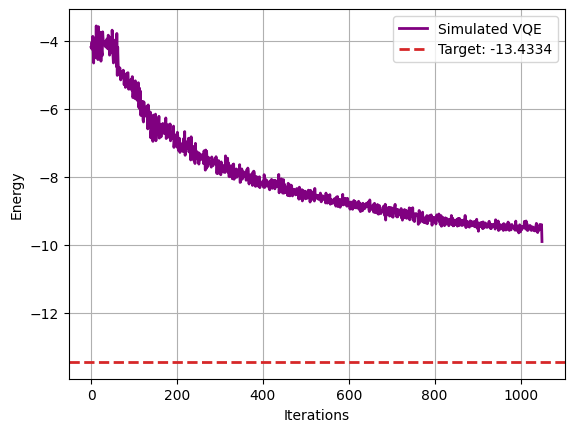

In [148]:
import matplotlib.pyplot as plt
plt.plot(intermediate_info, color='purple', lw=2, label='Simulated VQE')
plt.ylabel('Energy')
plt.xlabel('Iterations')
# Exact ground state energy value
plt.axhline(y=gs_energy, color="tab:red", ls="--", lw=2, label="Target: " + str(gs_energy))
plt.legend()
plt.grid()
plt.show()

# Ansatz From: https://arxiv.org/pdf/2112.14077

## Notes:
start2: -7.4 descent
start: barren plateau around -4

In [149]:
from qiskit.circuit.library import SwapGate
from scipy.linalg import expm
from qiskit.quantum_info.operators import Operator
from qiskit.extensions import HamiltonianGate

#eZZ gate
theta = 0.7809
Smat = SwapGate().to_matrix()
Sop = Operator(SwapGate())
#print(Sop)
#expS = expm(1j*Smat)
#def expSt(t):
#    return np.power(expS,t)

def eSwap(circ,i,j,t):
    eSt = HamiltonianGate(Sop,t,label = "eSwap")
    circ.append(eSt,[i,j])


def eZZ(circ,i,j,t):
    circ.cx(i,j)
    circ.rz(t,j)
    circ.cx(i,j)

def fij(circ,i,j,t):
    eSwap(circ,i,j,t)
    circ.cp(t,i,j)

def efSwap(circ,i,j,t):
    for k in range(j-1,i,-1):
        circ.cz(j,k)
    fij(circ,i,j,t)
    for k in range(i+1,j,1):
        circ.cz(j,k)

def hopping(circ,r):
    n = circ.num_qubits
    t_s = ParameterVector("t_h{r}".format(r=r),length = n)
    for i in range(n):
        efSwap(circ,i,(i+2)%n,t_s[i])

def interaction(circ,r):
    n = circ.num_qubits
    t_s = ParameterVector("t_i{r}".format(r=r),length = n//2)
    for i in range(0,n,2):
        eZZ(circ,i,i+1,t_s[i//2])


li = [i for i in range(0,n,4)]+[i+1 for i in range(0,n,4)]
def start(circ):
    n = circ.num_qubits
    for i in li:
        circ.x(i)
        circ.h(i+2)
        circ.cx(i,i+2)
    circ.barrier()

def start2(circ):
    n = circ.num_qubits
    li = [i for i in range(0,n//2,2)]+[n-1-i for i in range(0,n//2,2)]
    circ.x(li)
    circ.barrier()

def hopint(circ,reps = 3):
    for r in range(reps):
        hopping(circ,r)
        interaction(circ,r)
    

In [188]:
circ = QuantumCircuit(N)
start2(circ)
hopint(circ,reps = 5)
circ.draw(style = "mpl")


┌───┐ ░    ┌────────┐                                                »
 q_0: ┤ X ├─░────┤0       ├─■──────────────────────────────────────────────»
      └───┘ ░    │        │ │                 ┌────────┐                   »
 q_1: ──────░──■─┤  eSwap ├─┼────────────■────┤0       ├─■─────────────────»
      ┌───┐ ░  │ │        │ │P(t_h0[0])  │    │        │ │                 »
 q_2: ┤ X ├─░──■─┤1       ├─■────────────■──■─┤  eSwap ├─┼────────────■────»
      └───┘ ░    └────────┘                 │ │        │ │P(t_h0[1])  │    »
 q_3: ──────░───────────────────────────────■─┤1       ├─■────────────■──■─»
      ┌───┐ ░                                 └────────┘                 │ »
 q_4: ┤ X ├─░────────────────────────────────────────────────────────────■─»
      └───┘ ░                                                              »
 q_5: ──────░──────────────────────────────────────────────────────────────»
            ░                                                              »
 q_6: ──────░──────────────────────────────────────────────────────────────»
      ┌───┐ ░                                                              »
 q_7: ┤ X ├─░──────────────────────────────────────────────────────────────»
      └───┘ ░                                                              »
 q_8: ──────░──────────────────────────────────────────────────────────────»
      ┌───┐ ░                                                              »
 q_9: ┤ X ├─░──────────────────────────────────────────────────────────────»
      └───┘ ░                                                              »
q_10: ──────░──────────────────────────────────────────────────────────────»
      ┌───┐ ░                                                              »
q_11: ┤ X ├─░──────────────────────────────────────────────────────────────»
      └───┘ ░                                                              »
«                                                                              »
« q_0: ────────────────────────────────────────────────────────────────────────»
«                                                                              »
« q_1: ────────────────────────────────────────────────────────────────────────»
«      ┌────────┐                                                              »
« q_2: ┤0       ├─■──────────────────────────────────────────■─────────────────»
«      │        │ │                 ┌────────┐             ┌─┴─┐┌─────────────┐»
« q_3: ┤  eSwap ├─┼────────────■────┤0       ├─■───────────┤ X ├┤ Rz(t_i0[1]) ├»
«      │        │ │P(t_h0[2])  │    │        │ │           └───┘└─────────────┘»
« q_4: ┤1       ├─■────────────■──■─┤  eSwap ├─┼─────────────■─────────────────»
«      └────────┘                 │ │        │ │P(t_h0[3])   │                 »
« q_5: ───────────────────────────■─┤1       ├─■─────────────■─────────■───────»
«                                   └────────┘                         │       »
« q_6: ────────────────────────────────────────────────────────────────■───────»
«                                                                              »
« q_7: ────────────────────────────────────────────────────────────────────────»
«                                                                              »
« q_8: ────────────────────────────────────────────────────────────────────────»
«                                                                              »
« q_9: ────────────────────────────────────────────────────────────────────────»
«                                                                              »
«q_10: ────────────────────────────────────────────────────────────────────────»
«                                                                              »
«q_11: ────────────────────────────────────────────────────────────────────────»
«                                                                              »
«                                                       

In [189]:
ans1 = circ
print(ans1.num_qubits)

12


In [211]:
sampler = Sampler()
param_count = ans1.num_parameters
initial_point = np.random.random(param_count)*np.pi
#fidelity = QNSPSA.get_fidelity(ans1, sampler = sampler)
#optimizer = QNSPSA(fidelity,maxiter = 100)
optimizer = COBYLA(maxiter = 1000)
intermediate_info = []
params_info = []
vqe1 = VQE(est,ans1,optimizer,callback = callback,initial_point = initial_point)
eigen = vqe1.compute_minimum_eigenvalue(qubit_jw_op).eigenvalue
print(eigen)

-10.69378158227853


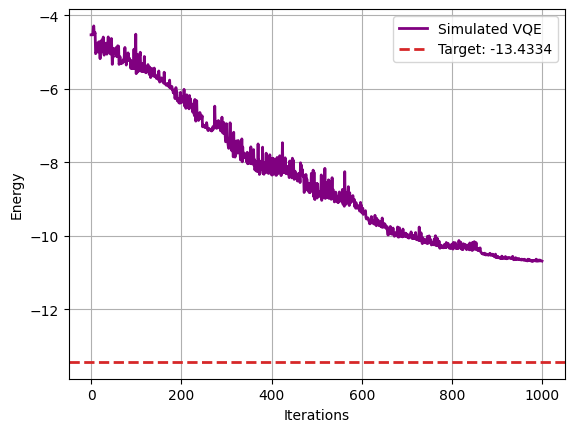

In [212]:
plt.plot(intermediate_info, color='purple', lw=2, label='Simulated VQE')
plt.ylabel('Energy')
plt.xlabel('Iterations')
# Exact ground state energy value
plt.axhline(y=gs_energy, color="tab:red", ls="--", lw=2, label="Target: " + str(gs_energy))
plt.legend()
plt.grid()
plt.show()

In [192]:
from qiskit.circuit import Gate
class ParticleSym(Gate):
    def __init__(self,params,rev = True,label = None):
        
        self._rev = rev
        self._params = list(params)
        
        if self._rev:
            self._params[1] = 0
        super().__init__("A",2,self._params)
    
    def _define(self):
        q = QuantumRegister(2, "q")
        circ = QuantumCircuit(q,name = self.name)
        p = self._params[1]+np.pi
        t = self._params[0]+np.pi/2
        circ.cx(1,0)
        '''theta = 2*self._params[0]
        lam = self._params[1]+np.pi
        phi = -self._params[1]
        circ.cu(theta,phi,lam,0,0,1)
        '''
        circ.rz(-p,1)
        circ.ry(-t,1)
        circ.cx(0,1)
        circ.ry(t,1)
        circ.rz(p,1)
        circ.cx(1,0)
        self.definition = circ

In [193]:
from math import factorial 
from qiskit.circuit import ParameterVector
from qiskit.circuit import QuantumRegister

def comb(n,m):
    return factorial(n)//(factorial(n-m)*factorial(m))

mapping = [(i,(i+1)%N) for i in range(N)]+ [(i,(i+2)%N) for i in range(N)]

def dimer(circ,r=1):
    a2 = []
    for i in range(len(mapping)):
        a2.append(ParameterVector("ß"+str(i)+str(r),2))

    for i in range(len(mapping)):
        circ.append(ParticleSym(a2[i]),mapping[i]) 

In [194]:
def hopintans(circ,reps = 3):
    for r in range(reps):
        hopping(circ,r)
        interaction(circ,r)
        dimer(circ,r)

In [204]:
ans2 = QuantumCircuit(N)
start2(ans2)
dimer(ans2)
hopint(ans2,reps = 3)
ans2.draw(style = "mpl")

┌───┐ ░ ┌──────────────┐                                                »
 q_0: ┤ X ├─░─┤0             ├────────────────────────────────────────────────»
      └───┘ ░ │  A(ß01[0],0) │┌──────────────┐                                »
 q_1: ──────░─┤1             ├┤0             ├────────────────────────────────»
      ┌───┐ ░ └──────────────┘│  A(ß11[0],0) │┌──────────────┐                »
 q_2: ┤ X ├─░─────────────────┤1             ├┤0             ├────────────────»
      └───┘ ░                 └──────────────┘│  A(ß21[0],0) │┌──────────────┐»
 q_3: ──────░─────────────────────────────────┤1             ├┤0             ├»
      ┌───┐ ░                                 └──────────────┘│  A(ß31[0],0) │»
 q_4: ┤ X ├─░─────────────────────────────────────────────────┤1             ├»
      └───┘ ░                                                 └──────────────┘»
 q_5: ──────░─────────────────────────────────────────────────────────────────»
            ░                                                                 »
 q_6: ──────░─────────────────────────────────────────────────────────────────»
      ┌───┐ ░                                                                 »
 q_7: ┤ X ├─░─────────────────────────────────────────────────────────────────»
      └───┘ ░                                                                 »
 q_8: ──────░─────────────────────────────────────────────────────────────────»
      ┌───┐ ░                                                                 »
 q_9: ┤ X ├─░─────────────────────────────────────────────────────────────────»
      └───┘ ░                                                                 »
q_10: ──────░─────────────────────────────────────────────────────────────────»
      ┌───┐ ░                                                                 »
q_11: ┤ X ├─░─────────────────────────────────────────────────────────────────»
      └───┘ ░                                                                 »
«                                                                        »
« q_0: ──────────────────────────────────────────────────────────────────»
«      ┌───────────────┐                                                 »
« q_1: ┤0              ├─────────────────────────────────────────────────»
«      │               │                                                 »
« q_2: ┤  A(ß131[0],0) ├─────────────────────────────────────────────────»
«      │               │                ┌───────────────┐                »
« q_3: ┤1              ├────────────────┤0              ├────────────────»
«      └┬──────────────┤                │               │                »
« q_4: ─┤0             ├────────────────┤  A(ß151[0],0) ├────────────────»
«       │  A(ß41[0],0) │┌──────────────┐│               │                »
« q_5: ─┤1             ├┤0             ├┤1              ├────────────────»
«       └──────────────┘│  A(ß51[0],0) │└┬──────────────┤                »
« q_6: ─────────────────┤1             ├─┤0             ├────────────────»
«                       └──────────────┘ │  A(ß61[0],0) │┌──────────────┐»
« q_7: ──────────────────────────────────┤1             ├┤0             ├»
«                                        └──────────────┘│  A(ß71[0],0) │»
« q_8: ──────────────────────────────────────────────────┤1             ├»
«                                                        └──────────────┘»
« q_9: ──────────────────────────────────────────────────────────────────»
«                                                                        »
«q_10: ──────────────────────────────────────────────────────────────────»
«                                                                        »
«q_11: ──────────────────────────────────────────────────────────────────»
«                                                                        »
«                                                        ┌───────────────┐»
« q_0: ────────────────────────────────────────────────

In [213]:
sampler = Sampler()
param_count = ans2.num_parameters
initial_point = np.random.random(param_count)*np.pi
#fidelity = QNSPSA.get_fidelity(ans2, sampler = sampler)
#optimizer = QNSPSA(fidelity,maxiter = 100)
optimizer = COBYLA(maxiter = 1000)
intermediate_info = []
params_info = []
vqe2 = VQE(est,ans2,optimizer,callback = callback,initial_point = initial_point)
eigen = vqe2.compute_minimum_eigenvalue(qubit_jw_op).eigenvalue
print(eigen)

-10.507689947184527


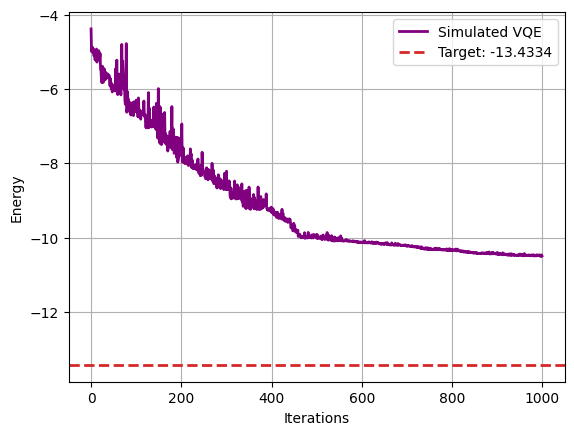

In [214]:
plt.plot(intermediate_info, color='purple', lw=2, label='Simulated VQE')
plt.ylabel('Energy')
plt.xlabel('Iterations')
# Exact ground state energy value
plt.axhline(y=gs_energy, color="tab:red", ls="--", lw=2, label="Target: " + str(gs_energy))
plt.legend()
plt.grid()
plt.show()

In [232]:
from qiskit.quantum_info import PauliList,Pauli,SparsePauliOp



def TotalSpin(num):
    pl = []
    for i in range(num):
        I_beg = "I"*i
        I_beg += "Z"
        I_beg += "I"*(num-i-1)
        pl.append(I_beg)

    p_list = PauliList(pl)
    sp_list = SparsePauliOp(p_list)
    tSpin = PauliSumOp(sp_list)
    return tSpin
print(TotalSpin(N))

1.0 * ZIIIIIIIIIII
+ 1.0 * IZIIIIIIIIII
+ 1.0 * IIZIIIIIIIII
+ 1.0 * IIIZIIIIIIII
+ 1.0 * IIIIZIIIIIII
+ 1.0 * IIIIIZIIIIII
+ 1.0 * IIIIIIZIIIII
+ 1.0 * IIIIIIIZIIII
+ 1.0 * IIIIIIIIZIII
+ 1.0 * IIIIIIIIIZII
+ 1.0 * IIIIIIIIIIZI
+ 1.0 * IIIIIIIIIIIZ


/var/folders/n_/1wl7_2l52y3g1_82hvk9hw3h0000gn/T/ipykernel_11925/1837032028.py:15: DeprecationWarning: The class ``qiskit.opflow.primitive_ops.pauli_sum_op.PauliSumOp`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  tSpin = PauliSumOp(sp_list)


# Add Symmetry Penalty

## Notes:
Does not work very well. Slows things down.

In [240]:
from qiskit.algorithms import MinimumEigensolver, VQEResult
from qiskit.opflow import (
    CircuitSampler,
    CircuitStateFn,
    ExpectationBase,
    ExpectationFactory,
    ListOp,
    OperatorBase,
    PauliSumOp,
    StateFn,
)
from typing import Union, List, Dict

# Define a custome VQE class to orchestra the ansatz, classical optimizers, 
# initial point, callback, and final result
class CustomVQE(MinimumEigensolver):
    
    def __init__(self, estimator, circuit, optimizer, callback=None, initial_point = None, sym = True):
        self._estimator = estimator
        self.ansatz = circuit
        self._optimizer = optimizer
        self._callback = callback
        self._initial_point = initial_point
        #backend = Aer.get_backend("statevector_simulator")
        #self._circuit_sampler = CircuitSampler(
        #    backend
        #)
        self._sym = sym
     
    '''def _get_eigenstate(self, optimal_parameters) -> Union[List[float], Dict[str, int]]:
        """Get the simulation outcome of the ansatz, provided with parameters."""
        optimal_circuit = self.ansatz.bind_parameters(optimal_parameters)
        state_fn = self._circuit_sampler.convert(StateFn(optimal_circuit)).eval()
        state = state_fn.primitive.data  # VectorStateFn -> Statevector -> np.array
        return state'''
    
    
    def compute_minimum_eigenvalue(self, operators, aux_operators=None):    
        num = 0
        # Define objective function to classically minimize over
        def objective(x, shots = None):
            #adjust number of shots
            # Execute job with estimator primitive
            if shots is not None:
                shots = int(shots)
                self._estimator.set_options(shots = shots)
            else:
                self._estimator.set_options(shots = 1024)
            job = self._estimator.run([self.ansatz], [operators], [x])
            # Get results from jobs
            est_result = job.result()
            # Get the measured energy value
            value = est_result.values[0]
            if self._sym:
                spinop = TotalSpin(self.ansatz.num_qubits)
                job_sym = self._estimator.run([self.ansatz], [spinop], [x])
                est_result_sym = job_sym.result()
                value_sym = est_result_sym.values[0]
                value += 0.5*(value_sym)**2
            # Save result information using callback function
            if self._callback is not None:
                self._callback(value)
            return value
            
        # Select an initial point for the ansatzs' parameters
        if self._initial_point is None:  
            x0 = np.pi/4 * np.random.rand(self.ansatz.num_parameters)
        else:
            x0 = self._initial_point
        # Run optimization
        res = self._optimizer.minimize(objective, x0=x0)
        
        # Populate VQE result
        result = VQEResult()
        result.cost_function_evals = res.nit
        result.eigenvalue = res.fun
        result.optimal_parameters = res.x
        result.eigenstate = None #self._get_eigenstate(result.optimal_parameters)
        
        return result

In [246]:
param_count = ans2.num_parameters
initial_point = np.random.random(param_count)*np.pi
#fidelity = QNSPSA.get_fidelity(ans2, sampler = sampler)
#optimizer = QNSPSA(fidelity,maxiter = 100)
optimizer = SPSA(maxiter = 1000)
intermediate_info = []
def callback(value):
        intermediate_info.append(value)
vqe3 = CustomVQE(est,ans2,optimizer,callback = callback,initial_point = initial_point,sym = True)
eigen = vqe3.compute_minimum_eigenvalue(qubit_jw_op).eigenvalue
print(eigen)

/var/folders/n_/1wl7_2l52y3g1_82hvk9hw3h0000gn/T/ipykernel_11925/1837032028.py:15: DeprecationWarning: The class ``qiskit.opflow.primitive_ops.pauli_sum_op.PauliSumOp`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  tSpin = PauliSumOp(sp_list)
/var/folders/n_/1wl7_2l52y3g1_82hvk9hw3h0000gn/T/ipykernel_11925/1837032028.py:15: DeprecationWarning: The class ``qiskit.opflow.primitive_ops.pauli_sum_op.PauliSumOp`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  tSpin = PauliSumOp(sp_list)
/var/folders/n_/1wl7_2l52y3g1_82hvk9hw3h0000gn/T/ipykernel_11925/1837032028.py:15: DeprecationWarning: The class ``qiskit.opflow.primitive_ops.pauli_sum_op.PauliSumOp`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier th

-8.991006856344724


/var/folders/n_/1wl7_2l52y3g1_82hvk9hw3h0000gn/T/ipykernel_11925/3666946855.py:74: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.vqe.VQEResult`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.VQEResult``. See https://qisk.it/algo_migration for a migration guide.
  result = VQEResult()


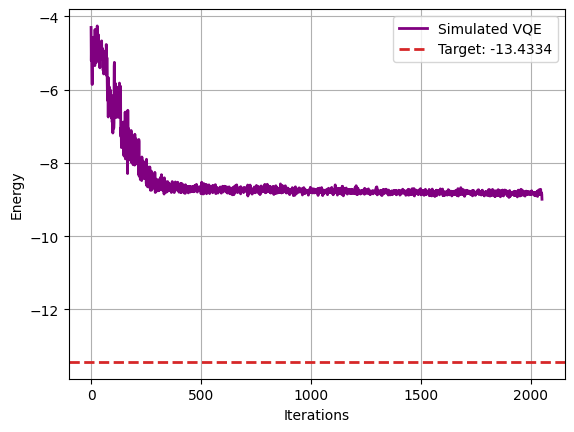

In [247]:
plt.plot(intermediate_info, color='purple', lw=2, label='Simulated VQE')
plt.ylabel('Energy')
plt.xlabel('Iterations')
# Exact ground state energy value
plt.axhline(y=gs_energy, color="tab:red", ls="--", lw=2, label="Target: " + str(gs_energy))
plt.legend()
plt.grid()
plt.show()